
# Exploring Disparities in Online Discourses: 
# The Impact of Search Filter Function on Outcomes across Multiple Platforms


# 1. Reddit
## 1.1 Obtain Reddit data using API 

In [61]:
import praw
import pandas as pd
from praw.models import MoreComments
import requests_cache

In [62]:
requests_cache.install_cache('Project')

In [161]:
import praw
import pandas as pd
import time


def reddit_request_rel(keyword):
        
    reddit = praw.Reddit(client_id="",         
                     client_secret="mMxCgouAzC9GOIjaWIDIsdA3L7NcGg",    
                     user_agent="heewonahn")   
        
    posts_dict = {"Title": [], "Post Text": [],
                  "ID": [], "Score": [],
                  "Total Comments": [], "Post URL": [],
                  "Comments": []}

    limit_per_request = 1000

    current_results = list(reddit.subreddit('all').search(keyword, limit=limit_per_request))

    for post in current_results:
        # Title of each post
        posts_dict["Title"].append(post.title)

        # Text inside a post
        posts_dict["Post Text"].append(post.selftext)

        # Unique ID of each post
        posts_dict["ID"].append(post.id)

        # The score of a post
        posts_dict["Score"].append(post.score)

        # Total number of comments inside the post
        posts_dict["Total Comments"].append(post.num_comments)

        # URL of each post
        posts_dict["Post URL"].append(post.url)

        comments = []

        for comment in post.comments:
            if not isinstance(comment, praw.models.MoreComments):  # MoreComments 제외
                comments.append(comment.body)
        posts_dict["Comments"].append(comments)


    # Saving the data in a pandas dataframe
    top_posts = pd.DataFrame(posts_dict)
    csv_file_path = f"{keyword}_relevance.csv"

    top_posts.to_csv(csv_file_path, index=False)  

def reddit_request_new(keyword):
    
    reddit = praw.Reddit(client_id="6_vFH6w-993-rirPb6reUw",         
                     client_secret="mMxCgouAzC9GOIjaWIDIsdA3L7NcGg",    
                     user_agent="heewonahn")   

    

    posts_dict = {"Title": [], "Post Text": [],
                  "ID": [], "Score": [],
                  "Total Comments": [], "Post URL": [],
                  "Comments": []}

 
    limit_per_request = 1000


    current_results = list(reddit.subreddit('all').search(keyword, limit=limit_per_request, sort='new'))

    for post in current_results:
        # Title of each post
        posts_dict["Title"].append(post.title)

        # Text inside a post
        posts_dict["Post Text"].append(post.selftext)

        # Unique ID of each post
        posts_dict["ID"].append(post.id)

        # The score of a post
        posts_dict["Score"].append(post.score)

        # Total number of comments inside the post
        posts_dict["Total Comments"].append(post.num_comments)

        # URL of each post
        posts_dict["Post URL"].append(post.url)

        comments = []
        for comment in post.comments:
            if not isinstance(comment, praw.models.MoreComments):  # MoreComments 제외
                comments.append(comment.body)
        posts_dict["Comments"].append(comments)



    # Saving the data in a pandas dataframe
    top_posts = pd.DataFrame(posts_dict)

    csv_file_path = f"{keyword}_new.csv"
    top_posts.to_csv(csv_file_path, index=False)



In [30]:
# obtain data 

# key=['gun regulation','abortion','gun control','self-harm','suicide']

# for keyword in key:
#     reddit_request_rel(keyword)
#     reddit_request_new(keyword)


In [4]:
import os
new_directory = '/Users/heewonahn/school_work/Project/Reddit/data'  
os.chdir(new_directory)
print("New current directory:", os.getcwd())

New current directory: /Users/heewonahn/school_work/Project/Reddit/data


In [12]:
import pandas as pd

abortion_new= pd.read_csv('abortion_new.csv')
abortion_relevance= pd.read_csv('abortion_relevance.csv')

gun_control_new= pd.read_csv('gun control_new.csv')
gun_control_relevance= pd.read_csv('gun control_relevance.csv')
gun_regulation_new= pd.read_csv('gun regulation_new.csv')
gun_regulation_relevance= pd.read_csv('gun regulation_relevance.csv')

self_harm_new=pd.read_csv('self-harm_new.csv')
self_harm_relevance=pd.read_csv('self-harm_relevance.csv')
suicide_new=pd.read_csv('suicide_new.csv')
suicide_relevance=pd.read_csv('suicide_relevance.csv')

suicide_harm_new=pd.concat([self_harm_new, suicide_new])
suicide_harm_relevance=pd.concat([self_harm_relevance, suicide_relevance])

gun_new=pd.concat([gun_control_new, gun_regulation_new])
gun_relevance=pd.concat([gun_control_relevance, gun_regulation_relevance])




# 1. Reddit 
## 1.2 Data preprocessing

In [13]:
# Making lists of combination of "Title" and "post text" to make post text data 

abortion_new_text = [(title + ' ' + text) if isinstance(text, str) else title for title, text in zip(abortion_new['Title'], abortion_new['Post Text'])]
abortion_rel_text = [(title + ' ' + text) if isinstance(text, str) else title for title, text in zip(abortion_relevance['Title'], abortion_relevance['Post Text'])]
gun_new_text = [(title + ' ' + text) if isinstance(text, str) else title for title, text in zip(gun_new['Title'], gun_new['Post Text'])]
gun_rel_text = [(title + ' ' + text) if isinstance(text, str) else title for title, text in zip(gun_relevance['Title'], gun_relevance['Post Text'])]
suicide_new_text = [(title + ' ' + text) if isinstance(text, str) else title for title, text in zip(suicide_harm_new['Title'], suicide_harm_new['Post Text'])]
suicide_rel_text = [(title + ' ' + text) if isinstance(text, str) else title for title, text in zip(suicide_harm_relevance['Title'], suicide_harm_relevance['Post Text'])]

# Making list of comments which are not empty 

abortion_new_comment = [comment for comments in abortion_new['Comments'] if comments != '[]' for comment in eval(comments)]
abortion_rel_comment = [comment for comments in abortion_relevance['Comments'] if comments != '[]' for comment in eval(comments)]
gun_new_comment = [comment for comments in gun_new['Comments'] if comments != '[]' for comment in eval(comments)]
gun_rel_comment = [comment for comments in gun_relevance['Comments'] if comments != '[]' for comment in eval(comments)]
suicide_new_comment = [comment for comments in suicide_harm_new['Comments'] if comments != '[]' for comment in eval(comments)]
suicide_rel_comment = [comment for comments in suicide_harm_relevance['Comments'] if comments != '[]' for comment in eval(comments)]

# Make Text datasets and Comment datasets
text_datasets = [abortion_new_text, abortion_rel_text, gun_new_text, gun_rel_text, suicide_new_text, suicide_rel_text]
comment_datasets = [abortion_new_comment, abortion_rel_comment, gun_new_comment, gun_rel_comment, suicide_new_comment, suicide_rel_comment]

text_titles = ['Abortion New Text', 'Abortion Relevance Text', 'Gun New Text', 'Gun Relevance Text', 'Suicide New Text', 'Suicide Relevance Text']
comment_titles = ['Abortion New Comments', 'Abortion Relevance Comments', 'Gun New Comments', 'Gun Relevance Comments', 'Suicide New Comments', 'Suicide Relevance Comments']

datasets = list(zip(text_datasets, text_titles))
comment_lists = list(zip(comment_datasets, comment_titles))

print("Number of Data before Preprocessing\n")

for (text_dataset, text_title), (comment_dataset, comment_title) in zip(datasets, comment_lists):
    print(f"({text_title}): {len(text_dataset)} items, Number of Comments: {len(comment_dataset)}")


Number of Data before Preprocessing

(Abortion New Text): 249 items, Number of Comments: 1910
(Abortion Relevance Text): 232 items, Number of Comments: 27386
(Gun New Text): 441 items, Number of Comments: 3354
(Gun Relevance Text): 435 items, Number of Comments: 23177
(Suicide New Text): 494 items, Number of Comments: 1343
(Suicide Relevance Text): 452 items, Number of Comments: 40863


In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


stopwords = set(stopwords.words('english'))
additional_stopwords = ["want", "thank", "like"]  
stopwords.update(additional_stopwords)

ps = PorterStemmer()


def preprocess(comments):
    preprocessed_comments = []
    unique_comments = set()  # erasing common comments 
    
    for comment in comments:
        try:
            pattern = re.compile(r'I am a bot', re.IGNORECASE) # ignoring comment written by bot
            if pattern.search(comment):
                continue
            
            comment = comment.lower() # lower casing 
            comment = re.sub(r'[^a-zA-Z\s]', '', comment) # only English letters 
            words = word_tokenize(comment) # tokenize
            words = [ps.stem(word) for word in words if word not in stopwords and len(word) <= 15] #stop words removel, erasing words more than 15 letters, stemming  
            preprocessed_comment = ' '.join(words)
            
            if preprocessed_comment not in unique_comments:
                preprocessed_comments.append(preprocessed_comment)
                unique_comments.add(preprocessed_comment)
        except:
            continue
    
    return preprocessed_comments


In [16]:
abortion_new_text = preprocess(abortion_new_text)
abortion_rel_text = preprocess(abortion_rel_text)
gun_new_text = preprocess(gun_new_text)
gun_rel_text = preprocess(gun_rel_text)
suicide_new_text = preprocess(suicide_new_text)
suicide_rel_text = preprocess(suicide_rel_text)

abortion_new_comment = preprocess(abortion_new_comment)
abortion_rel_comment = preprocess(abortion_rel_comment)
gun_new_comment = preprocess(gun_new_comment)
gun_rel_comment = preprocess(gun_rel_comment)
suicide_new_comment = preprocess(suicide_new_comment)
suicide_rel_comment = preprocess(suicide_rel_comment)


In [17]:
# Make Text datasets and Comment datasets
text_datasets = [abortion_new_text, abortion_rel_text, gun_new_text, gun_rel_text, suicide_new_text, suicide_rel_text]
comment_datasets = [abortion_new_comment, abortion_rel_comment, gun_new_comment, gun_rel_comment, suicide_new_comment, suicide_rel_comment]

text_titles = ['Abortion New Text', 'Abortion Relevance Text', 'Gun New Text', 'Gun Relevance Text', 'Suicide New Text', 'Suicide Relevance Text']
comment_titles = ['Abortion New Comments', 'Abortion Relevance Comments', 'Gun New Comments', 'Gun Relevance Comments', 'Suicide New Comments', 'Suicide Relevance Comments']

datasets = list(zip(text_datasets, text_titles))
comment_lists = list(zip(comment_datasets, comment_titles))

print("Number of Data after Preprocessing\n")

for (text_dataset, text_title), (comment_dataset, comment_title) in zip(datasets, comment_lists):
    print(f"({text_title}): {len(text_dataset)} items, Number of Comments: {len(comment_dataset)}")


Number of Data after Preprocessing

(Abortion New Text): 235 items, Number of Comments: 1809
(Abortion Relevance Text): 213 items, Number of Comments: 25792
(Gun New Text): 410 items, Number of Comments: 3189
(Gun Relevance Text): 390 items, Number of Comments: 21544
(Suicide New Text): 461 items, Number of Comments: 1213
(Suicide Relevance Text): 418 items, Number of Comments: 37300


# Reddit
## 1.3 `TFIDF`

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

reddit_tfidf = []
stopwords = set(stopwords.words('english'))
additional_stopwords = ["want", "thank", "like", "fuck", "good"]  
stopwords.update(additional_stopwords)

for text_dataset, comment_dataset in zip(text_datasets, comment_datasets):
    text_title = text_titles[text_datasets.index(text_dataset)]
    comment_title = comment_titles[comment_datasets.index(comment_dataset)]
    
    text_word_freq = {}
    for sentence in text_dataset:
        tokens = word_tokenize(sentence)
        for token in tokens:
            if token.lower() not in stopwords:
                score = sia.polarity_scores(token)['compound']
                if score != 0:
                    text_word_freq[token.lower()] = text_word_freq.get(token.lower(), 0) + 1

    top_5_text = sorted(text_word_freq.items(), key=lambda x: x[1], reverse=True)[:5]
    
    comment_word_freq = {}
    for comment in comment_dataset:
        comment_tokens = word_tokenize(comment)
        for token in comment_tokens:
            if token.lower() not in stopwords:
                score = sia.polarity_scores(token)['compound']
                if score != 0:                                        
                    comment_word_freq[token.lower()] = comment_word_freq.get(token.lower(), 0) + 1
    top_5_comments = sorted(comment_word_freq.items(), key=lambda x: x[1], reverse=True)[:5]
    
    reddit_tfidf.append((text_title, [(word, freq) for word, freq in top_5_text], comment_title, [(word, freq) for word, freq in top_5_comments]))

# 데이터프레임 생성
df = pd.DataFrame(reddit_tfidf, columns=['Text Title', 'Top 5 Words in Text', 'Comment Title', 'Top 5 Words in Comments'])
df.to_csv('reddit_tfidf.csv', index=False)

In [41]:
df

,Text Title,Top 5 Words in Text,Comment Title,Top 5 Words in Comments
0,Abortion New Text,"[(help, 66), (support, 61), (love, 56), (frien...",Abortion New Comments,"[(care, 105), (help, 93), (well, 91), (sure, 8..."
1,Abortion Relevance Text,"[(ban, 36), (help, 29), (friend, 28), (support...",Abortion Relevance Comments,"[(care, 1388), (support, 1072), (love, 1058), ..."
2,Gun New Text,"[(gun, 834), (weapon, 513), (kill, 405), (well...",Gun New Comments,"[(gun, 1363), (shoot, 281), (well, 269), (prob..."
3,Gun Relevance Text,"[(gun, 798), (shoot, 82), (weapon, 51), (ban, ...",Gun Relevance Comments,"[(gun, 16125), (shoot, 2419), (ban, 1629), (pr..."
4,Suicide New Text,"[(help, 293), (friend, 285), (harm, 258), (lov...",Suicide New Comments,"[(help, 161), (better, 104), (bad, 87), (hope,..."
5,Suicide Relevance Text,"[(cut, 55), (harm, 54), (help, 52), (friend, 4...",Suicide Relevance Comments,"[(help, 2493), (love, 1847), (harm, 1681), (be..."


# Reddit 
## 1.4 `Topic modeling` 

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import plotly.express as px


def preprocess_corpus(corpus):
    # Tokenize
    corpus_tokenized = [nltk.word_tokenize(document) for document in corpus]

    # Define stopwords
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend([',', '.', ':', '!', ';', '?', '@', '(', ')', "'s","'", '`', '"'])
    
    # Remove stopwords
    corpus_stop_removed = [[word for word in document if word not in stopwords] for document in corpus_tokenized]

    # Stemming
    corpus_stemmed = [[nltk.PorterStemmer().stem(word) for word in document] for document in corpus_stop_removed]

    # Join tokens back into sentences
    preprocessed_corpus = [' '.join(document) for document in corpus_stemmed]

    return preprocessed_corpus

def fit_lda_model(text_elements, ntopics):
    fin_corpus = preprocess_corpus(text_elements)

    # LDA
    vec = CountVectorizer(tokenizer=nltk.word_tokenize)
    freq = vec.fit_transform(fin_corpus)
    corpus_bin = freq.todense()
    corpus_bin_arr = np.array(corpus_bin)

    lda = LatentDirichletAllocation(
        n_components=ntopics, learning_method='online', random_state=2024
    )
    lda.fit(corpus_bin_arr)
    posterior = lda.transform(corpus_bin_arr)

    return lda, posterior, ntopics, vec

def plot_lda_probabilities(df):
    # Melt the DataFrame for plotting
    melted_df = pd.melt(df, id_vars='chapter')

    # Create the line plot using Plotly Express
    fig = px.line(melted_df, x='chapter', y='value', color='variable', labels={
        'chapter': 'Article',
        'value': 'Probability',
        'variable': 'LDA Topics'
    })

    # Centering the title
    fig.update_layout(
        title=dict(
            text='LDA Probabilities',
            x=0.5  # Set x-coordinate to 0.5 for centering
        )
    )

    # Show the plot
    fig.show()

def get_top_words_for_topic(lda, vec, ntopics, topic_name, top_n=10):
    # Calculate word probabilities for each topic
    word_topics_df = pd.DataFrame(lda.components_.T, index=vec.get_feature_names_out())
    word_topics_df = word_topics_df.apply(lambda x: x / sum(x), axis=1)
    word_topics_df.columns = [f'Topic {i + 1}' for i in range(0, ntopics)]

    # Get the specified topic's column and sort in descending order
    top_words = word_topics_df[topic_name].sort_values(ascending=False).head(top_n)
    return top_words

def classify_chapters_by_topic(df, ntopics):
    # Find the topic with the maximum probability for each chapter
    df['classified_topic'] = df[[f'Topic {i + 1}' for i in range(ntopics)]].idxmax(axis=1)

    # Count the number of chapters assigned to each topic
    topic_counts = df['classified_topic'].value_counts()

    return topic_counts

In [ ]:
reddit_lda_results = []

for (text_dataset, text_title), (comment_dataset, comment_title) in zip(datasets, comment_lists):
    # Fit LDA model for text dataset
    lda_text, posterior_text, ntopics_text, vec_text = fit_lda_model(text_dataset, ntopics=2)
    
    # Get top words for text dataset
    top_words_text_topic1 = get_top_words_for_topic(lda_text, vec_text, ntopics_text, 'Topic 1')
    top_words_text_topic2 = get_top_words_for_topic(lda_text, vec_text, ntopics_text, 'Topic 2')
    
    # Fit LDA model for comment dataset
    lda_comment, posterior_comment, ntopics_comment, vec_comment = fit_lda_model(comment_dataset, ntopics=2)
    
    # Get top words for comment dataset
    top_words_comment_topic1 = get_top_words_for_topic(lda_comment, vec_comment, ntopics_comment, 'Topic 1')
    top_words_comment_topic2 = get_top_words_for_topic(lda_comment, vec_comment, ntopics_comment, 'Topic 2')
    
    # Append results to the list
    reddit_lda_results.append((text_title, top_words_text_topic1, top_words_text_topic2,
                                comment_title, top_words_comment_topic1, top_words_comment_topic2))


# for result in reddit_lda_results:
#     print(result)

In [107]:
columns = ['Text Title', 'Top Words in Text (Topic 1)', 'Top Words in Text (Topic 2)',
           'Comment Title', 'Top Words in Comments (Topic 1)', 'Top Words in Comments (Topic 2)']

reddit_lda_df = pd.DataFrame(reddit_lda_results, columns=columns)
reddit_lda_df.to_csv('reddit_topic_modeling.csv', index=False)


# 1. Reddit
## 1.5 `Sentimental Analysis` of Text and Comments 

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sia = SentimentIntensityAnalyzer()

# def analyze_sentiment(comments):
#     positive_count = 0
#     negative_count = 0
#     neutral_count = 0
    
#     for comment in comments:
#         sentiment_score = sia.polarity_scores(comment)
#         if sentiment_score['compound'] > 0.05:
#             positive_count += 1
#         elif sentiment_score['compound'] < -0.05:
#             negative_count += 1
#         else:
#             neutral_count += 1
    
#     return positive_count, negative_count, neutral_count


# stopwords = set(stopwords.words('english'))
# additional_stopwords = ["want", "thank", "like", "fuck","good"]
# stopwords.update(additional_stopwords)

# for (text, title), (comments, comment_title) in zip(datasets, comment_lists):
    
#     sentiment_counts_text = analyze_sentiment(text)
#     sentiment_counts_comments = analyze_sentiment(comments)

#     text_word_freq = {}
#     for sentence in text:
#         tokens = word_tokenize(sentence)
#         for token in tokens:
#             if token.lower() not in stopwords:
#                 score = sia.polarity_scores(token)['compound']
#                 if score != 0:
#                     text_word_freq[token.lower()] = text_word_freq.get(token.lower(), 0) + 1

#     text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text_word_freq)

#     comment_word_freq = {}
#     for comment in comments:
#         comment_tokens = word_tokenize(comment)
#         for token in comment_tokens:
#             if token.lower() not in stopwords:
#                 score = sia.polarity_scores(token)['compound']
#                 if score != 0:                                        
#                     comment_word_freq[token.lower()] = comment_word_freq.get(token.lower(), 0) + 1
#     comment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(comment_word_freq)

#     fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
#     axes[0, 0].imshow(text_wordcloud, interpolation='bilinear')
#     axes[0, 0].set_title(f'Word Cloud of {title}')
#     axes[0, 0].text(0.5, 0.5, 'Text', fontsize=18, ha='center')
#     axes[0, 0].axis('off')
    
#     axes[0, 1].imshow(comment_wordcloud, interpolation='bilinear')
#     axes[0, 1].set_title(f'Word Cloud of {comment_title}')
#     axes[0, 1].text(0.5, 0.5, 'Comments', fontsize=18, ha='center')
#     axes[0, 1].axis('off')
    
#     N = 1
#     ind = np.arange(N)
#     width = 0.2
    
#     rects1 = axes[1, 0].bar(ind - width, sentiment_counts_text[0], width, label='Positive', color='lightgreen')
#     rects2 = axes[1, 0].bar(ind, sentiment_counts_text[1], width, label='Negative', color='lightcoral')
#     rects3 = axes[1, 0].bar(ind + width, sentiment_counts_text[2], width, label='Neutral', color='lightskyblue')

#     axes[1, 0].set_ylabel('Counts')
#     axes[1, 0].set_title('Sentiment Analysis of ' + title)
#     axes[1, 0].set_xticks(ind)
#     axes[1, 0].set_xticklabels([title], rotation=45, ha='right')
#     axes[1, 0].legend()
    
    
#     rects4 = axes[1, 1].bar(ind - width, sentiment_counts_comments[0], width, label='Positive', color='lightgreen')
#     rects5 = axes[1, 1].bar(ind, sentiment_counts_comments[1], width, label='Negative', color='lightcoral')
#     rects6 = axes[1, 1].bar(ind + width, sentiment_counts_comments[2], width, label='Neutral', color='lightskyblue')

#     axes[1, 1].set_ylabel('Counts')
#     axes[1, 1].set_title('Sentiment Analysis of ' + comment_title)
#     axes[1, 1].set_xticks(ind)
#     axes[1, 1].set_xticklabels([comment_title], rotation=45, ha='right')
#     axes[1, 1].legend()
    
    
#     def autolabel(rects, ax):
#         for rect in rects:
#             height = rect.get_height()
#             ax.annotate('{}'.format(height),
#                         xy=(rect.get_x() + rect.get_width() / 2, height),
#                         xytext=(0, 3),  
#                         textcoords="offset points",
#                         ha='center', va='bottom')
      
#     autolabel(rects1, axes[1,0])
#     autolabel(rects2, axes[1,0])
#     autolabel(rects3, axes[1,0])
    
    
#     autolabel(rects4, axes[1,1])
#     autolabel(rects5, axes[1,1])
#     autolabel(rects6, axes[1,1])
    
    
    
#     plt.tight_layout()
#     plt.show()


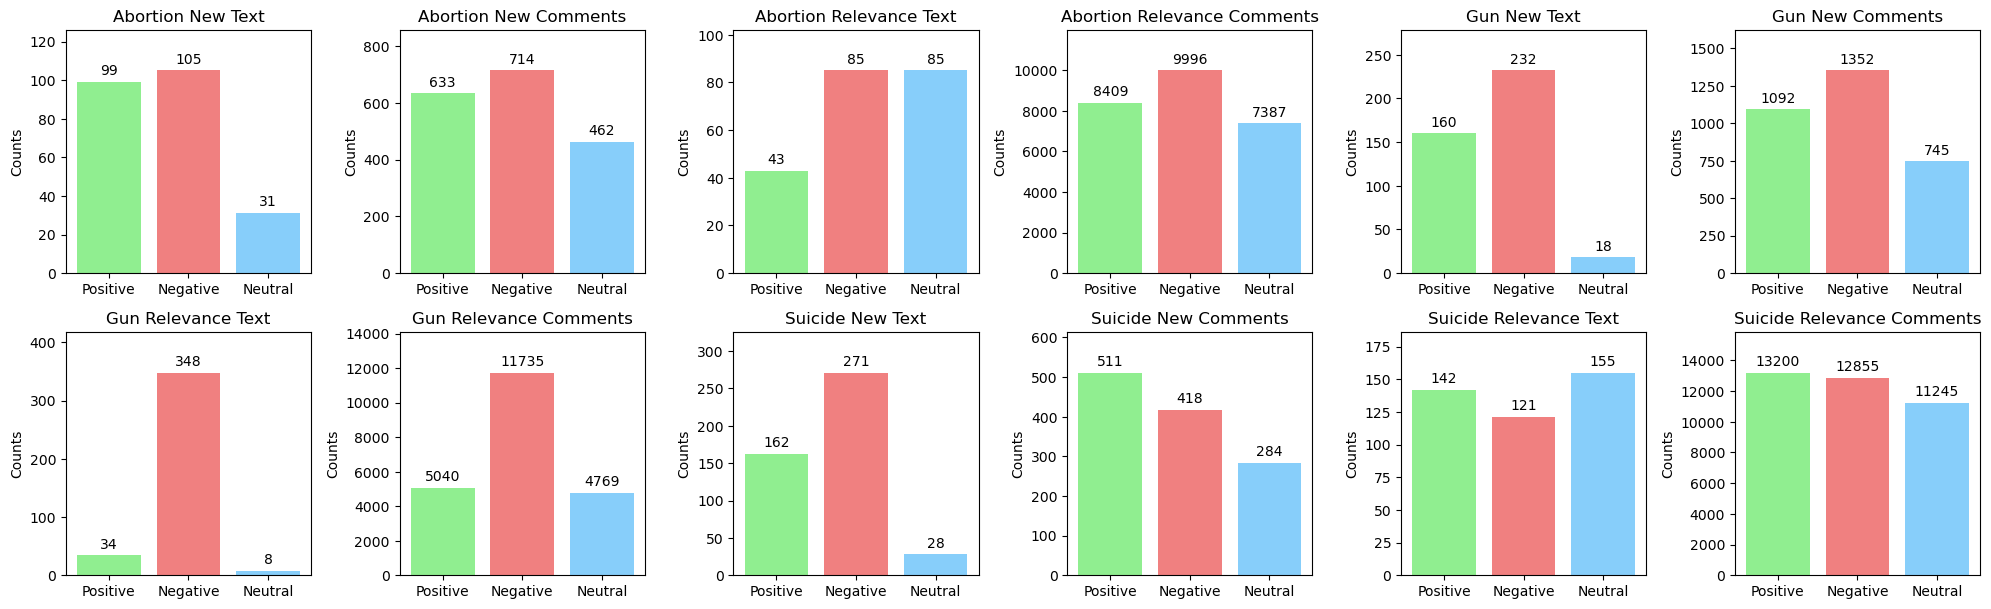

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(comments):
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    
    for comment in comments:
        sentiment_score = sia.polarity_scores(comment)
        if sentiment_score['compound'] > 0.05:
            positive_count += 1
        elif sentiment_score['compound'] < -0.05:
            negative_count += 1
        else:
            neutral_count += 1
    
    return positive_count, negative_count, neutral_count

fig = plt.figure(figsize=(20, 12))

for i, ((text, title), (comments, comment_title)) in enumerate(zip(datasets, comment_lists)):
    
    sentiment_counts_text = analyze_sentiment(text)
    sentiment_counts_comments = analyze_sentiment(comments)

    ax1 = fig.add_subplot(4, 6, i*2+1)
    labels = ['Positive', 'Negative', 'Neutral']
    values_text = list(sentiment_counts_text)
    rects1 = ax1.bar(labels, values_text, color=['lightgreen', 'lightcoral', 'lightskyblue'])
    ax1.set_title(title)
    ax1.set_ylabel('Counts')

    ax1.set_ylim(0, max(values_text) * 1.2)

    ax2 = fig.add_subplot(4, 6, i*2+2)
    values_comments = list(sentiment_counts_comments)
    rects2 = ax2.bar(labels, values_comments, color=['lightgreen', 'lightcoral', 'lightskyblue'])
    ax2.set_title(comment_title)
    ax2.set_ylabel('Counts')

    ax2.set_ylim(0, max(values_comments) * 1.2)

    def autolabel(rects, ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1, ax1)
    autolabel(rects2, ax2)

plt.tight_layout()

plt.savefig('sentiment_analysis_combined_with_values.png', bbox_inches='tight')

plt.show()


# 2. Youtube 
## 2.1 obtain Youtube data using API 

In [ ]:
# Text data 
import os
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import pandas as pd


API_KEY = ""
youtube = build("youtube", "v3", developerKey=API_KEY)

keyword_combinations = ["suicide", "self harm","abortion","gun control","gun regulation"] 

query_list = []
link_list = []
description_list = []
title_list = []
date_list = []
duration_list = []
channel_list = []  

try:
    for keyword in keyword_combinations:
        nextPageToken = None

        for _ in range(10):  
            print(f"Processing page {_+1} for keyword: {keyword_combinations}")
            search_response = youtube.search().list(
                q=keyword,
                type="video",
                part="id,snippet",
                maxResults=50,
                order="relevance", 
                pageToken=nextPageToken
            ).execute()

            
            nextPageToken = search_response.get("nextPageToken")

            for search_result in search_response.get("items", []):
                video_id = search_result["id"]["videoId"]
                video_url = f"https://www.youtube.com/watch?v={video_id}"
                video_response = youtube.videos().list(
                    part="snippet,contentDetails",
                    id=video_id
                ).execute()

                if video_response.get('items'):
                    video_data = video_response['items'][0]
                    snippet = video_data['snippet']
                    contentDetails = video_data['contentDetails']

                    query_list.append(keyword)
                    link_list.append(video_url)
                    description_list.append(snippet.get('description', 'N/A'))
                    title_list.append(snippet.get('title', 'N/A'))
                    date_list.append(snippet.get('publishedAt', 'N/A'))
                    duration_list.append(contentDetails.get('duration', 'N/A'))
                    channel_list.append(snippet.get('channelTitle', 'N/A'))  

except HttpError as e:
    print(f"An HTTP error {e.resp.status} occurred: {e.content}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

df = pd.DataFrame({
    "Query": query_list, 
    "Link": link_list, 
    "Description": description_list,
    "Title": title_list, 
    "Date": date_list, 
    "Duration": duration_list,
    "Channel": channel_list  
})

df.to_excel("E:/OneDrive - University of California, Davis/Documents/●●UC DAVIS●●/2 Coursework/2024 Winter/STA 220 Web Analysis/Data/suicide_relevance.xlsx")

In [79]:

# date 
df = pd.read_excel("data_incorporated.xlsx")
filtered_df = df[(df['Query'].isin(['suicide', 'self harm'])) & (df['Filter'] == 'Date')]
unique_queries = filtered_df['Query'].unique()
filtered_df.to_excel("filtered_data_date.xlsx", index=False)


In [ ]:

# relevance 
df = pd.read_excel("data_incorporated.xlsx")
filtered_df = df[(df['Query'].isin(['suicide', 'self harm'])) & (df['Filter'] == 'Relevance')]
unique_queries = filtered_df['Query'].unique()
filtered_df.to_excel("filtered_data_Relevance.xlsx", index=False)



In [ ]:

# comment 
import pandas as pd
from tqdm import tqdm
from googleapiclient.discovery import build
import googleapiclient.errors

api_key = ""
youtube = build("youtube", "v3", developerKey=api_key)

df = pd.read_excel("filtered_data_date.xlsx")
linkss = df["Link"]

result_list = []

for link in tqdm(linkss):  
    video_id = link.split("v=")[1]  
    comment_count = 0  

    try:
        request = youtube.commentThreads().list(part="snippet", videoId=video_id, maxResults=100)
    except googleapiclient.errors.HttpError as e:
        print(f"An HTTP error occurred for video ID {video_id}: {e}")
        continue
    
    while True:
        if comment_count >= 20:  
            break

        try:
            response = request.execute()  
        except googleapiclient.errors.HttpError as e:
            print(f"An HTTP error occurred for video ID {video_id}: {e}")
            break

        for item in response["items"]:
            if comment_count >= 20:  
                break
            comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
            author = item["snippet"]["topLevelComment"]["snippet"]["authorDisplayName"]
            result_list.append({"Link": link, "Author": author, "Comment": comment})
            comment_count += 1 
        
        if "nextPageToken" in response:
            request = youtube.commentThreads().list(part="snippet", videoId=video_id, pageToken=response["nextPageToken"], maxResults=100)
        else:
            break

result_df = pd.DataFrame(result_list)
result_df.to_excel("/Users/heewonahn/Downloads/suicide_date.xlsx", index=False)


In [ ]:
#comment
import pandas as pd
from tqdm import tqdm
from googleapiclient.discovery import build
import googleapiclient.errors

api_key = ""
youtube = build("youtube", "v3", developerKey=api_key)

df = pd.read_excel("filtered_data_Relevance.xlsx")
linkss = df["Link"]

result_list = []

for link in tqdm(linkss):  
    video_id = link.split("v=")[1]  
    comment_count = 0  

    try:
        request = youtube.commentThreads().list(part="snippet", videoId=video_id, maxResults=100)
    except googleapiclient.errors.HttpError as e:
        print(f"An HTTP error occurred for video ID {video_id}: {e}")
        continue
    
    while True:
        if comment_count >= 20:  
            break

        try:
            response = request.execute()  
        except googleapiclient.errors.HttpError as e:
            print(f"An HTTP error occurred for video ID {video_id}: {e}")
            break

        for item in response["items"]:
            if comment_count >= 20:  
                break
            comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
            author = item["snippet"]["topLevelComment"]["snippet"]["authorDisplayName"]
            result_list.append({"Link": link, "Author": author, "Comment": comment})
            comment_count += 1 
        
        if "nextPageToken" in response:
            request = youtube.commentThreads().list(part="snippet", videoId=video_id, pageToken=response["nextPageToken"], maxResults=100)
        else:
            break

result_df = pd.DataFrame(result_list)
result_df.to_excel("/Users/heewonahn/Downloads/suicide_rel.xlsx", index=False)


In [57]:
import pandas as pd
#merging all the data and remove duplicated data 
comment_6000 = pd.read_excel('comment_6000.xlsx')
comment_4000 = pd.read_excel('comment_4000.xlsx')
comment_2000 = pd.read_excel('comment_2000.xlsx')
suicide_comments_date=pd.read_excel('suicide_date.xlsx')
suicide_comments_rel=pd.read_excel('suicide_rel.xlsx')

combined_df = pd.concat([comment_6000, comment_4000, comment_2000])

combined_df = combined_df.drop_duplicates() 
combined_df.loc[combined_df['Query'].isin(['gun control', 'gun regulations', 'shooting']), 'Query'] = 'gun'  
# merging gun related data to one variable 

In [58]:
abortion_comments_rel= combined_df.loc[(combined_df['Query'] == 'abortion') & (combined_df['Filter'] == 'Relevance'), 'Comment'].tolist()
abortion_comments_date= combined_df.loc[(combined_df['Query'] == 'abortion') & (combined_df['Filter'] == 'Date'), 'Comment'].tolist()
gun_comments_rel= combined_df.loc[(combined_df['Query'] == 'gun') & (combined_df['Filter'] == 'Relevance'), 'Comment'].tolist()
gun_comments_date= combined_df.loc[(combined_df['Query'] == 'gun') & (combined_df['Filter'] == 'Date'), 'Comment'].tolist()
suicide_comments_rel= suicide_comments_rel['Comment'].tolist()
suicide_comments_date= suicide_comments_date['Comment'].tolist()


In [59]:

df = pd.read_excel("data_incorporated.xlsx")
df['combined_text'] = df['Title'].astype(str).fillna('') + ' ' + df['Description'].astype(str).fillna('') + ' ' + df['Transcript'].astype(str).fillna('')



filtered_df_1 = df[df['Query'].isin(['gun control', 'gun regulations'])]
selected_data_guncontrol_Date = filtered_df_1[filtered_df_1['Filter'] == 'Date']['combined_text'].to_list()
selected_data_guncontrol_Relevance = filtered_df_1[filtered_df_1['Filter'] == 'Relevance']['combined_text'].to_list()


filtered_df_2 = df[df['Query'].isin(['abortion'])]
selected_data_abortion_Date = filtered_df_2[filtered_df_2['Filter'] == 'Date']['combined_text'].to_list()
selected_data_abortion_Relevance = filtered_df_2[filtered_df_2['Filter'] == 'Relevance']['combined_text'].to_list()

filtered_df_3 = df[df['Query'].isin(['suicide', 'self harm'])]
selected_data_selfharm_Date = filtered_df_3[filtered_df_3['Filter'] == 'Date']['combined_text'].to_list()
selected_data_selfharm_Relevance = filtered_df_3[filtered_df_3['Filter'] == 'Relevance']['combined_text'].to_list()


In [60]:
youtube_text = [selected_data_abortion_Relevance, selected_data_abortion_Date, 
                selected_data_guncontrol_Relevance, selected_data_guncontrol_Date,
                selected_data_selfharm_Relevance, selected_data_selfharm_Date]
youtube_comment = [abortion_comments_rel, abortion_comments_date, 
                   gun_comments_rel, gun_comments_date, 
                   suicide_comments_rel, suicide_comments_date]
text_titles = ['Abortion Relevance Text', 'Abortion Date Text',
               'Gun Relevance Text', 'Gun Date Text',
               'Suicide Relevance Text', 'Suicide Date Text']

youtube_comment_titles = ['Abortion Relevance Comments', 'Abortion Date Comments', 
                          'Gun Relevance Comments', 'Gun Date Comments',
                          'Suicide Relevance Comments', 'Suicide Date Comments']

youtube_data_lists = list(zip(youtube_text, text_titles))
youtube_comment_lists = list(zip(youtube_comment, youtube_comment_titles))




print("Number of Data before Preprocessing\n")



for (youtube_text, text_titles), (youtube_comment, youtube_comment_titles) in zip(youtube_data_lists, youtube_comment_lists ):
    print(f"({text_titles}): {len(youtube_text)} items, Number of Comments: {len(youtube_comment)}")
    

Number of Data before Preprocessing

(Abortion Relevance Text): 950 items, Number of Comments: 2043
(Abortion Date Text): 997 items, Number of Comments: 9385
(Gun Relevance Text): 800 items, Number of Comments: 1247
(Gun Date Text): 1000 items, Number of Comments: 22692
(Suicide Relevance Text): 1000 items, Number of Comments: 15733
(Suicide Date Text): 1000 items, Number of Comments: 15512


# 2. Youtube 
## 2.2 `data preprocess`

In [34]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

stopwords = set(stopwords.words('english'))
additional_stopwords = ["want", "thank", "like", "fuck", "good","okay","yeah","well","uh"]  
stopwords.update(additional_stopwords)

ps = PorterStemmer()

def youtube_preprocess(comments):
    preprocessed_comments = []
    unique_comments = set()  # erasing common comments 
    
    for comment in comments:
        try:
            pattern = re.compile(r'I am a bot', re.IGNORECASE) # ignoring comment written by bot
            if pattern.search(comment):
                continue
            
            comment = comment.lower() # lower casing 
            comment = re.sub(r'[^a-zA-Z\s]', '', comment) # only English letters 
            words = word_tokenize(comment) # tokenize
            words = [ps.stem(word) for word in words if word not in stopwords and len(word) <= 15] #stop words removel, erasing words more than 15 letters, stemming  
            preprocessed_comment = ' '.join(words)
            
            if preprocessed_comment and preprocessed_comment not in unique_comments:
                preprocessed_comments.append(preprocessed_comment)
                unique_comments.add(preprocessed_comment)
        except:
            continue
    
    return preprocessed_comments


In [35]:
abortion_comments_rel = youtube_preprocess(abortion_comments_rel)
abortion_comments_date = youtube_preprocess(abortion_comments_date)
gun_comments_rel = youtube_preprocess(gun_comments_rel)
gun_comments_date = youtube_preprocess(gun_comments_date)
suicide_comments_rel = youtube_preprocess(suicide_comments_rel)
suicide_comments_date = youtube_preprocess(suicide_comments_date)

selected_data_selfharm_Relevance=youtube_preprocess(selected_data_selfharm_Relevance)
selected_data_selfharm_Date=youtube_preprocess(selected_data_selfharm_Date)
selected_data_abortion_Relevance=youtube_preprocess(selected_data_abortion_Relevance)
selected_data_abortion_Date=youtube_preprocess(selected_data_abortion_Date)
selected_data_guncontrol_Date=youtube_preprocess(selected_data_guncontrol_Date)
selected_data_guncontrol_Relevance=youtube_preprocess(selected_data_guncontrol_Relevance)

In [36]:
youtube_text = [selected_data_abortion_Relevance, selected_data_abortion_Date, 
                selected_data_guncontrol_Relevance, selected_data_guncontrol_Date,
                selected_data_selfharm_Relevance, selected_data_selfharm_Date]
youtube_comment = [abortion_comments_rel, abortion_comments_date, 
                   gun_comments_rel, gun_comments_date, 
                   suicide_comments_rel, suicide_comments_date]
text_titles = ['Abortion Relevance Text', 'Abortion Date Text',
               'Gun Relevance Text', 'Gun Date Text',
               'Suicide Relevance Text', 'Suicide Date Text']

youtube_comment_titles = ['Abortion Relevance Comments', 'Abortion Date Comments', 
                          'Gun Relevance Comments', 'Gun Date Comments',
                          'Suicide Relevance Comments', 'Suicide Date Comments']

youtube_data_lists = list(zip(youtube_text, text_titles))
youtube_comment_lists = list(zip(youtube_comment, youtube_comment_titles))




print("Number of Data after Preprocessing\n")



for (youtube_text, text_titles), (youtube_comment, youtube_comment_titles) in zip(youtube_data_lists, youtube_comment_lists ):
    print(f"({text_titles}): {len(youtube_text)} items, Number of Comments: {len(youtube_comment)}")
    

Number of Data after Preprocessing

(Abortion Relevance Text): 571 items, Number of Comments: 1937
(Abortion Date Text): 610 items, Number of Comments: 8844
(Gun Relevance Text): 685 items, Number of Comments: 1215
(Gun Date Text): 936 items, Number of Comments: 21368
(Suicide Relevance Text): 942 items, Number of Comments: 13317
(Suicide Date Text): 918 items, Number of Comments: 12766


# 2. Youtube
## 2.3 `TFIDF`

In [11]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

sia = SentimentIntensityAnalyzer()
stopwords = set(stopwords.words('english'))
additional_stopwords = ["want", "thank", "like", "fuck", "good", "okay", "yeah", "well"]  
stopwords.update(additional_stopwords)

youtube_tfidf = []

for ((text_dataset, text_title), (comment_dataset, comment_title)) in zip(youtube_data_lists, youtube_comment_lists):
    text_word_freq = {}
    for sentence in text_dataset:
        tokens = word_tokenize(sentence)
        for token in tokens:
            if token.lower() not in stopwords:
                score = sia.polarity_scores(token)['compound']
                if score != 0:
                    text_word_freq[token.lower()] = text_word_freq.get(token.lower(), 0) + 1

    top_10_text = sorted(text_word_freq.items(), key=lambda x: x[1], reverse=True)[:5]
    
    comment_word_freq = {}
    for comment in comment_dataset:
        comment_tokens = word_tokenize(comment)
        for token in comment_tokens:
            if token.lower() not in stopwords:
                score = sia.polarity_scores(token)['compound']
                if score != 0:                                        
                    comment_word_freq[token.lower()] = comment_word_freq.get(token.lower(), 0) + 1
    top_10_comments = sorted(comment_word_freq.items(), key=lambda x: x[1], reverse=True)[:5]
    
    youtube_tfidf.append((text_title, [(word, freq) for word, freq in top_10_text], 
                         comment_title, [(word, freq) for word, freq in top_10_comments]))

youtube_df = pd.DataFrame(youtube_tfidf, columns=['Text Title', 'Top 10 Words in Text', 'Comment Title', 'Top 10 Words in Comments'])

youtube_df.to_csv('youtube_tfidf_1.csv', index=False)


In [122]:
youtube_df

,Text Title,Top 10 Words in Text,Comment Title,Top 10 Words in Comments
0,Abortion Relevance Text,"[(care, 787), (ban, 557), (help, 516), (suppor...",Abortion Relevance Comments,"[(god, 180), (kill, 127), (murder, 125), (love..."
1,Abortion Date Text,"[(care, 695), (ban, 563), (support, 487), (hel...",Abortion Date Comments,"[(kill, 639), (god, 588), (murder, 495), (care..."
2,Gun Relevance Text,"[(gun, 12522), (shoot, 2276), (weapon, 1562), ...",Gun Relevance Comments,"[(gun, 806), (protect, 85), (kill, 85), (shoot..."
3,Gun Date Text,"[(gun, 17088), (shoot, 2862), (weapon, 2259), ...",Gun Date Comments,"[(gun, 8359), (shoot, 1575), (crime, 915), (st..."
4,Suicide Relevance Text,"[(help, 1462), (harm, 966), (love, 944), (kind...",Suicide Relevance Comments,"[(love, 1431), (help, 1176), (harm, 1009), (cu..."
5,Suicide Date Text,"[(help, 1409), (harm, 940), (love, 913), (kind...",Suicide Date Comments,"[(love, 1382), (help, 1141), (harm, 973), (cut..."


# 2. Youtube 
## 2.4 `Topic Modeling `

In [123]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import plotly.express as px


def preprocess_corpus(corpus):
    # Tokenize
    corpus_tokenized = [nltk.word_tokenize(document) for document in corpus]

    # Define stopwords
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend([',', '.', ':', '!', ';', '?', '@', '(', ')', "'s","'", '`', '"'])
    
    # Remove stopwords
    corpus_stop_removed = [[word for word in document if word not in stopwords] for document in corpus_tokenized]

    # Stemming
    corpus_stemmed = [[nltk.PorterStemmer().stem(word) for word in document] for document in corpus_stop_removed]

    # Join tokens back into sentences
    preprocessed_corpus = [' '.join(document) for document in corpus_stemmed]

    return preprocessed_corpus

def fit_lda_model(text_elements, ntopics):
    fin_corpus = preprocess_corpus(text_elements)

    # LDA
    vec = CountVectorizer(tokenizer=nltk.word_tokenize)
    freq = vec.fit_transform(fin_corpus)
    corpus_bin = freq.todense()
    corpus_bin_arr = np.array(corpus_bin)

    lda = LatentDirichletAllocation(
        n_components=ntopics, learning_method='online', random_state=2024
    )
    lda.fit(corpus_bin_arr)
    posterior = lda.transform(corpus_bin_arr)

    return lda, posterior, ntopics, vec

def plot_lda_probabilities(df):
    # Melt the DataFrame for plotting
    melted_df = pd.melt(df, id_vars='chapter')

    # Create the line plot using Plotly Express
    fig = px.line(melted_df, x='chapter', y='value', color='variable', labels={
        'chapter': 'Article',
        'value': 'Probability',
        'variable': 'LDA Topics'
    })

    # Centering the title
    fig.update_layout(
        title=dict(
            text='LDA Probabilities',
            x=0.5  # Set x-coordinate to 0.5 for centering
        )
    )

    # Show the plot
    fig.show()

def get_top_words_for_topic(lda, vec, ntopics, topic_name, top_n=10):
    # Calculate word probabilities for each topic
    word_topics_df = pd.DataFrame(lda.components_.T, index=vec.get_feature_names_out())
    word_topics_df = word_topics_df.apply(lambda x: x / sum(x), axis=1)
    word_topics_df.columns = [f'Topic {i + 1}' for i in range(0, ntopics)]

    # Get the specified topic's column and sort in descending order
    top_words = word_topics_df[topic_name].sort_values(ascending=False).head(top_n)
    return top_words

def classify_chapters_by_topic(df, ntopics):
    # Find the topic with the maximum probability for each chapter
    df['classified_topic'] = df[[f'Topic {i + 1}' for i in range(ntopics)]].idxmax(axis=1)

    # Count the number of chapters assigned to each topic
    topic_counts = df['classified_topic'].value_counts()

    return topic_counts

In [ ]:
youtube_lda_results = []
for (text_dataset, text_title), (comment_dataset, comment_title) in zip(youtube_data_lists, youtube_comment_lists):
    # Fit LDA model for text dataset
    lda_text, posterior_text, ntopics_text, vec_text = fit_lda_model(text_dataset, ntopics=2)
    
    # Get top words for text dataset
    top_words_text_topic1 = get_top_words_for_topic(lda_text, vec_text, ntopics_text, 'Topic 1')
    top_words_text_topic2 = get_top_words_for_topic(lda_text, vec_text, ntopics_text, 'Topic 2')
    
    # Fit LDA model for comment dataset
    lda_comment, posterior_comment, ntopics_comment, vec_comment = fit_lda_model(comment_dataset, ntopics=2)
    
    # Get top words for comment dataset
    top_words_comment_topic1 = get_top_words_for_topic(lda_comment, vec_comment, ntopics_comment, 'Topic 1')
    top_words_comment_topic2 = get_top_words_for_topic(lda_comment, vec_comment, ntopics_comment, 'Topic 2')
    
    # Append results to the list
    youtube_lda_results.append((text_title, top_words_text_topic1, top_words_text_topic2,
                                comment_title, top_words_comment_topic1, top_words_comment_topic2))


# for result in youtube_lda_results:
#     print(result)

In [126]:
columns = ['Text Title', 'Top Words in Text (Topic 1)', 'Top Words in Text (Topic 2)',
           'Comment Title', 'Top Words in Comments (Topic 1)', 'Top Words in Comments (Topic 2)']

youtube_lda_df = pd.DataFrame(youtube_lda_results, columns=columns)
youtube_lda_df.to_csv('youtube_topic_modeling.csv', index=False)


# 2. Youtube 
## 2.5 `Sentimental Analysis` of Text and Comments 

In [2]:

# import numpy as np
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.sentiment.vader import SentimentIntensityAnalyzer


# # 감정 분석을 위한 SentimentIntensityAnalyzer 객체 생성
# sia = SentimentIntensityAnalyzer()

# # analyze_sentiment
# def analyze_sentiment(comments):
#     positive_count = 0
#     negative_count = 0
#     neutral_count = 0
    
#     for comment in comments:
#         sentiment_score = sia.polarity_scores(comment)
#         if sentiment_score['compound'] > 0.05:
#             positive_count += 1
#         elif sentiment_score['compound'] < -0.05:
#             negative_count += 1
#         else:
#             neutral_count += 1
    
#     return positive_count, negative_count, neutral_count


# stopwords = set(stopwords.words('english'))
# additional_stopwords = ["want", "thank", "like", "fuck", "good","okay","yeah"]  
# stopwords.update(additional_stopwords)

# for (text, title), (comments, comment_title) in zip(youtube_data_lists, youtube_comment_lists):
    
#     sentiment_counts_text = analyze_sentiment(text)
#     sentiment_counts_comments = analyze_sentiment(comments)

#     text_word_freq = {}
#     for sentence in text:
#         tokens = word_tokenize(sentence)
#         for token in tokens:
#             if token.lower() not in stopwords:
#                 score = sia.polarity_scores(token)['compound']
#                 if score != 0:
#                     text_word_freq[token.lower()] = text_word_freq.get(token.lower(), 0) + 1

#     text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text_word_freq)

#     comment_word_freq = {}
#     for comment in comments:
#         comment_tokens = word_tokenize(comment)
#         for token in comment_tokens:
#             if token.lower() not in stopwords:
#                 score = sia.polarity_scores(token)['compound']
#                 if score != 0:                                        
#                     comment_word_freq[token.lower()] = comment_word_freq.get(token.lower(), 0) + 1
#     comment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(comment_word_freq)

#     fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
#     axes[0, 0].imshow(text_wordcloud, interpolation='bilinear')
#     axes[0, 0].set_title(f'Word Cloud of {title}')
#     axes[0, 0].text(0.5, 0.5, 'Text', fontsize=18, ha='center')
#     axes[0, 0].axis('off')
    
#     axes[0, 1].imshow(comment_wordcloud, interpolation='bilinear')
#     axes[0, 1].set_title(f'Word Cloud of {comment_title}')
#     axes[0, 1].text(0.5, 0.5, 'Comments', fontsize=18, ha='center')
#     axes[0, 1].axis('off')
    
#     N = 1
#     ind = np.arange(N)
#     width = 0.2
    
#     rects1 = axes[1, 0].bar(ind - width, sentiment_counts_text[0], width, label='Positive', color='lightgreen')
#     rects2 = axes[1, 0].bar(ind, sentiment_counts_text[1], width, label='Negative', color='lightcoral')
#     rects3 = axes[1, 0].bar(ind + width, sentiment_counts_text[2], width, label='Neutral', color='lightskyblue')

#     axes[1, 0].set_ylabel('Counts')
#     axes[1, 0].set_title('Sentiment Analysis of ' + title)
#     axes[1, 0].set_xticks(ind)
#     axes[1, 0].set_xticklabels([title], rotation=45, ha='right')
#     axes[1, 0].legend()
    
    
#     rects4 = axes[1, 1].bar(ind - width, sentiment_counts_comments[0], width, label='Positive', color='lightgreen')
#     rects5 = axes[1, 1].bar(ind, sentiment_counts_comments[1], width, label='Negative', color='lightcoral')
#     rects6 = axes[1, 1].bar(ind + width, sentiment_counts_comments[2], width, label='Neutral', color='lightskyblue')

#     axes[1, 1].set_ylabel('Counts')
#     axes[1, 1].set_title('Sentiment Analysis of ' + comment_title)
#     axes[1, 1].set_xticks(ind)
#     axes[1, 1].set_xticklabels([comment_title], rotation=45, ha='right')
#     axes[1, 1].legend()
    
    
#     def autolabel(rects, ax):
#         for rect in rects:
#             height = rect.get_height()
#             ax.annotate('{}'.format(height),
#                         xy=(rect.get_x() + rect.get_width() / 2, height),
#                         xytext=(0, 3),  
#                         textcoords="offset points",
#                         ha='center', va='bottom')
      
#     autolabel(rects1, axes[1,0])
#     autolabel(rects2, axes[1,0])
#     autolabel(rects3, axes[1,0])
    
    
#     autolabel(rects4, axes[1,1])
#     autolabel(rects5, axes[1,1])
#     autolabel(rects6, axes[1,1])
    
    
    
#     plt.tight_layout()
#     plt.show()


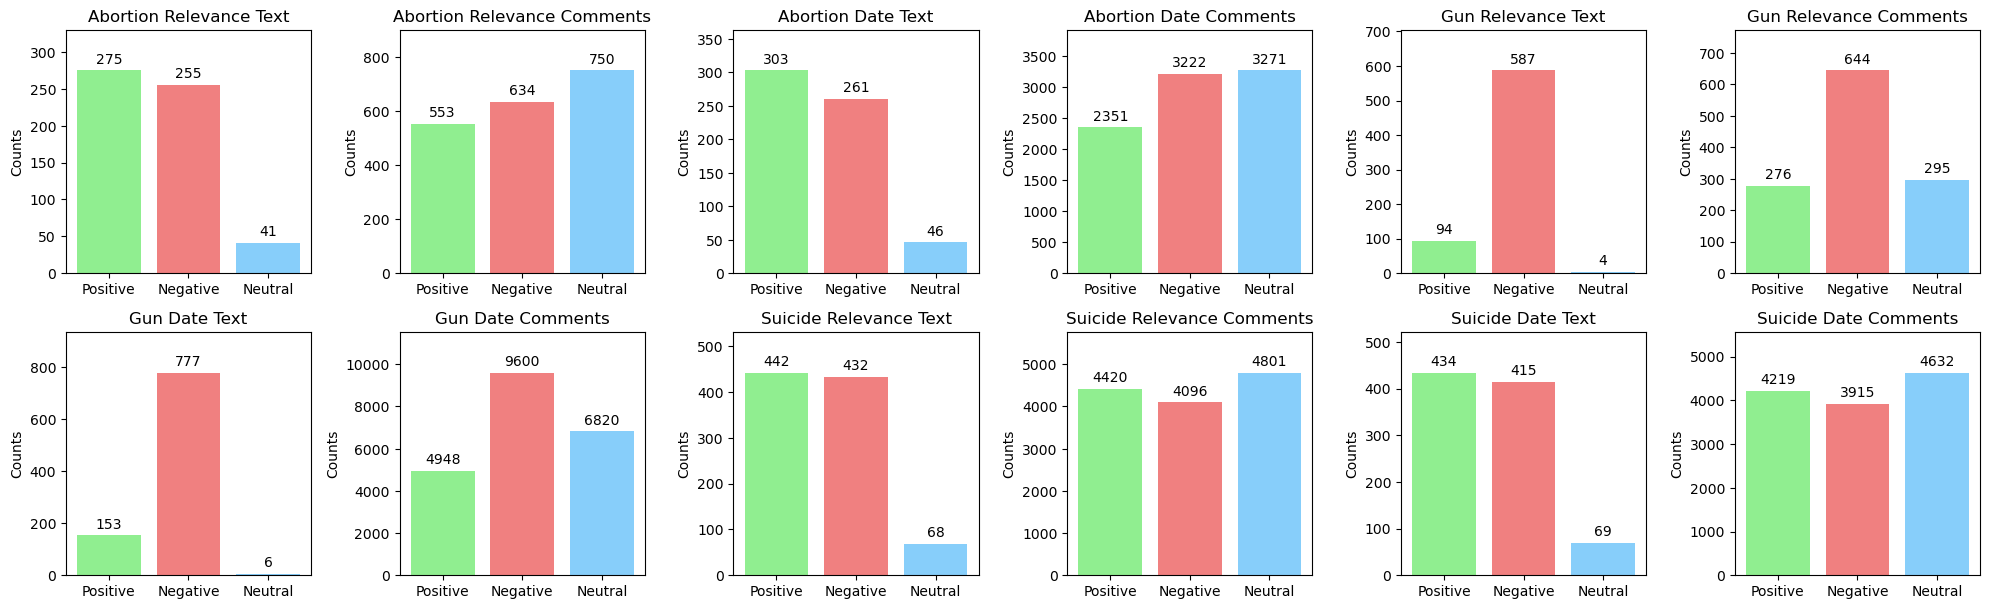

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(comments):
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    
    for comment in comments:
        sentiment_score = sia.polarity_scores(comment)
        if sentiment_score['compound'] > 0.05:
            positive_count += 1
        elif sentiment_score['compound'] < -0.05:
            negative_count += 1
        else:
            neutral_count += 1
    
    return positive_count, negative_count, neutral_count

fig = plt.figure(figsize=(20, 12))

for i, ((text, title), (comments, comment_title)) in enumerate(zip(youtube_data_lists, youtube_comment_lists)):
    
    sentiment_counts_text = analyze_sentiment(text)
    sentiment_counts_comments = analyze_sentiment(comments)

    ax1 = fig.add_subplot(4, 6, i*2+1)
    labels = ['Positive', 'Negative', 'Neutral']
    values_text = list(sentiment_counts_text)
    rects1 = ax1.bar(labels, values_text, color=['lightgreen', 'lightcoral', 'lightskyblue'])
    ax1.set_title(title)
    ax1.set_ylabel('Counts')

    ax1.set_ylim(0, max(values_text) * 1.2)
    ax2 = fig.add_subplot(4, 6, i*2+2)
    values_comments = list(sentiment_counts_comments)
    rects2 = ax2.bar(labels, values_comments, color=['lightgreen', 'lightcoral', 'lightskyblue'])
    ax2.set_title(comment_title)
    ax2.set_ylabel('Counts')

    ax2.set_ylim(0, max(values_comments) * 1.2)
    def autolabel(rects, ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1, ax1)
    autolabel(rects2, ax2)

plt.tight_layout()

plt.savefig('youtubE_sentiment_analysis_combined_with_values.png', bbox_inches='tight')

plt.show()


# 3. Yahoo News 
## 3.1 obtain Yahoo News by web scraping

In [ ]:
import requests
import requests_cache
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import plotly.express as px

In [ ]:
def collect_urls(base_url, categories, keyword):
    # Create a webdriver
    driver = webdriver.Chrome()

    # Iterate through categories
    all_urls = []
    for category in categories:
        # Open the webpage
        driver.get(base_url + category)

        # Scroll down
        body = driver.find_element("tag name", "body")

        # Define a variable to store the initial height of the page
        last_height = driver.execute_script("return document.body.scrollHeight")

        while True:
            # Scroll down to the bottom
            body.send_keys(Keys.END)

            # Wait for some time to allow content to load (you may adjust this time)
            time.sleep(2)

            # Get the new height of the page
            new_height = driver.execute_script("return document.body.scrollHeight")

            # Break the loop if no more scrolling is possible (reached the bottom)
            if new_height == last_height:
                break

            # Update the last height
            last_height = new_height

        html_source = driver.page_source
        soup = BeautifulSoup(html_source, "html.parser")

        id_module_stream = soup.find_all(id="module-stream")

        # Find all elements with class names starting with 'js-content-viewer'
        titles = soup.find_all(class_=lambda x: x and x.startswith('js-content-viewer rapidnofollow stream-title'))
        contents = soup.find_all(class_=lambda x: x and x.startswith('finance-ticker-fetch-success'))

        category_urls = []

        # Iterate through titles and contents
        for title, content in zip(titles, contents):
            # Check if the keyword is present in either title or content
            if keyword in title.get_text() or keyword in content.get_text():
                # If the keyword is present, append the URL to the list
                href = title.get("href", '')
                url = base_url + href
                category_urls.append(url)

        # Append category_urls to all_urls
        all_urls.extend(category_urls)

    # Close the webdriver
    driver.quit()

    return all_urls

In [ ]:
def scrape_urls_elements(urls): 
    data_list = []

    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "html.parser")

        # Retrieve header text
        headers = soup.find_all(id=lambda x: x and x.startswith('caas-lead-header'))
        header_text = headers[0].get_text() if headers else ""

        # Retrieve body text
        bodies = soup.find_all(class_="caas-body")
        body_text = bodies[0].get_text() if bodies else ""

        # Add entry to the list as a list [header, body]
        entry_list = [header_text, body_text]
        data_list.append(entry_list)

    return data_list

def scrape_urls_elements_2(urls): 
    data_list = []

    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "html.parser")

        # Retrieve header text
        headers = soup.find_all(id=lambda x: x and x.startswith('caas-lead-header'))
        header_text = headers[0].get_text() if headers else ""

        # Retrieve body text
        bodies = soup.find_all(class_="caas-body")
        body_text = bodies[0].get_text() if bodies else ""

        # Combine header and body text into a single string
        combined_text = f"{header_text} {body_text}"

        # Add entry to the list as a single string
        data_list.append(combined_text)

    return data_list

In [ ]:
abortion_elements = scrape_urls_elements_2(final_abortion_urls)
gun_elements = scrape_urls_elements_2(final_gun_urls)
suicide_elements = scrape_urls_elements_2(final_suicide_urls)

# 3.Yahoo news
## 3.2 `data preprocess`

In [70]:
yahoo_gun=pd.read_csv('yahoo_gun_post.csv')
yahoo_abortion=pd.read_csv('yahoo_abortion_post.csv')
yahoo_suicide=pd.read_csv('yahoo_suicide_post.csv')
yahoo_gun= yahoo_gun['0'].tolist()
yahoo_abortion= yahoo_abortion['0'].tolist()
yahoo_suicide=yahoo_suicide['0'].tolist()

In [71]:
yahoo_suicide = preprocess(yahoo_suicide)
yahoo_abortion = preprocess(yahoo_abortion)
yahoo_gun = preprocess(yahoo_gun)


In [67]:
yahoo_text=[yahoo_suicide,yahoo_abortion,yahoo_gun]
yahoo_titles=['yahoo_suicide_text','yahoo_abortion_text','yahoo_gun_text']
yahoo_text_datasets=list(zip(yahoo_text,yahoo_titles))

In [69]:
print('Total number of',yahoo_titles[0], ':',len(yahoo_suicide))
print('Total number of',yahoo_titles[1], ':',len(yahoo_abortion))
print('Total number of',yahoo_titles[2], ':',len(yahoo_gun))

Total number of yahoo_suicide_text : 6
Total number of yahoo_abortion_text : 13
Total number of yahoo_gun_text : 19


# 3.Yahoo news 
## 3.3 `TFIDF`

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

yahoo_tfidf = []
stopwords = set(stopwords.words('english'))
additional_stopwords = ["want", "thank", "like", "fuck", "good"]  
stopwords.update(additional_stopwords)


for yahoo_text, yahoo_titles in yahoo_text_datasets:
    
    text_word_freq = {}
    for sentence in yahoo_text:
        tokens = word_tokenize(sentence)
        for token in tokens:
            if token.lower() not in stopwords:
                score = sia.polarity_scores(token)['compound']
                if score != 0:
                    text_word_freq[token.lower()] = text_word_freq.get(token.lower(), 0) + 1

    top_5_text = sorted(text_word_freq.items(), key=lambda x: x[1], reverse=True)[:5]
    
    
    yahoo_tfidf.append((yahoo_titles, [(word, freq) for word, freq in top_5_text]))

df = pd.DataFrame(yahoo_tfidf, columns=['Text Title', 'Top 5 Words in Text'])
df.to_csv('yahoo_tfidf.csv', index=False)

# 3. Yahoo news
## 3.4 `Topic Modeling`

In [ ]:
yahoo_lda_results = []

for (yahoo_text, yahoo_titles) in list(zip(yahoo_text,yahoo_titles)):
    # Fit LDA model for text dataset
    lda_text, posterior_text, ntopics_text, vec_text = fit_lda_model(yahoo_text, ntopics=2)
    
    # Get top words for text dataset
    top_words_text_topic1 = get_top_words_for_topic(lda_text, vec_text, ntopics_text, 'Topic 1')
    top_words_text_topic2 = get_top_words_for_topic(lda_text, vec_text, ntopics_text, 'Topic 2')
    
    # Append results to the list
    yahoo_lda_results.append((yahoo_titles, top_words_text_topic1, top_words_text_topic2))
                                

In [202]:
columns = ['Text Title', 'Top Words in Text (Topic 1)', 'Top Words in Text (Topic 2)']
yahoo_lda_df = pd.DataFrame(yahoo_lda_results, columns=columns)
yahoo_lda_df.to_csv('yahoo_topic_modeling.csv', index=False)

# 3. Yahoo news 
## 3.5 `Sentimental Analysis` 

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sia = SentimentIntensityAnalyzer()

# def analyze_sentiment(comments):
#     positive_count = 0
#     negative_count = 0
#     neutral_count = 0
    
#     for comment in comments:
#         sentiment_score = sia.polarity_scores(comment)
#         if sentiment_score['compound'] > 0.05:
#             positive_count += 1
#         elif sentiment_score['compound'] < -0.05:
#             negative_count += 1
#         else:
#             neutral_count += 1
    
#     return positive_count, negative_count, neutral_count


# stopwords = set(stopwords.words('english'))
# additional_stopwords = ["want", "thank", "like", "fuck","good"]
# stopwords.update(additional_stopwords)


# for (yahoo_text, yahoo_titles) in yahoo_text_datasets:
    
#     sentiment_counts_text = analyze_sentiment(yahoo_text)

#     text_word_freq = {}
#     for sentence in yahoo_text:
#         tokens = word_tokenize(sentence)
#         for token in tokens:
#             if token.lower() not in stopwords:
#                 score = sia.polarity_scores(token)['compound']
#                 if score != 0:
#                     text_word_freq[token.lower()] = text_word_freq.get(token.lower(), 0) + 1

#     text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text_word_freq)

    
#     fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
#     axes[0, 0].imshow(text_wordcloud, interpolation='bilinear')
#     axes[0, 0].set_title(f'Word Cloud of {title}')
#     axes[0, 0].text(0.5, 0.5, 'Text', fontsize=18, ha='center')
#     axes[0, 0].axis('off')
    
  
    
#     N = 1
#     ind = np.arange(N)
#     width = 0.2
    
#     rects1 = axes[1, 0].bar(ind - width, sentiment_counts_text[0], width, label='Positive', color='lightgreen')
#     rects2 = axes[1, 0].bar(ind, sentiment_counts_text[1], width, label='Negative', color='lightcoral')
#     rects3 = axes[1, 0].bar(ind + width, sentiment_counts_text[2], width, label='Neutral', color='lightskyblue')

#     axes[1, 0].set_ylabel('Counts')
#     axes[1, 0].set_title('Sentiment Analysis of ' + title)
#     axes[1, 0].set_xticks(ind)
#     axes[1, 0].set_xticklabels([yahoo_titles], rotation=45, ha='right')
#     axes[1, 0].legend()
    
 
    
#     def autolabel(rects, ax):
#         for rect in rects:
#             height = rect.get_height()
#             ax.annotate('{}'.format(height),
#                         xy=(rect.get_x() + rect.get_width() / 2, height),
#                         xytext=(0, 3),  
#                         textcoords="offset points",
#                         ha='center', va='bottom')
      
#     autolabel(rects1, axes[1,0])
#     autolabel(rects2, axes[1,0])
#     autolabel(rects3, axes[1,0])
    
    
    
#     plt.tight_layout()
#     plt.show()

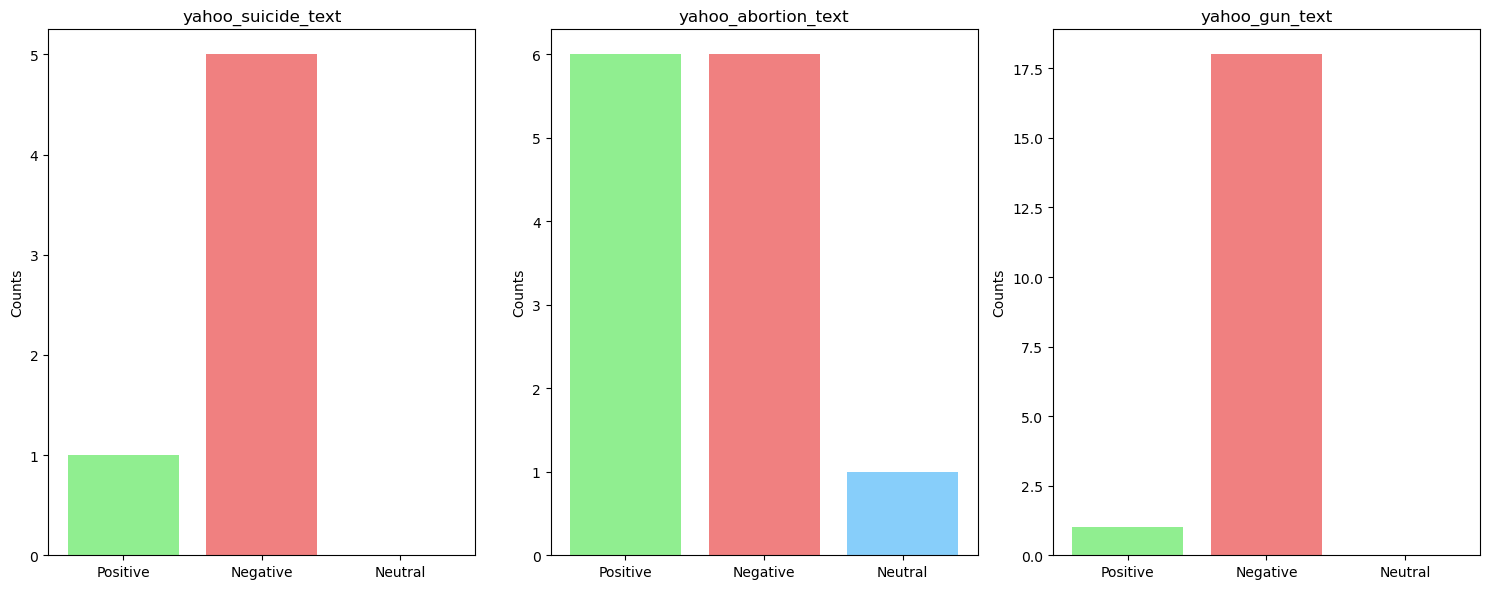

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(comments):
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    
    for comment in comments:
        sentiment_score = sia.polarity_scores(comment)
        if sentiment_score['compound'] > 0.05:
            positive_count += 1
        elif sentiment_score['compound'] < -0.05:
            negative_count += 1
        else:
            neutral_count += 1
    
    return positive_count, negative_count, neutral_count

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, (yahoo_text, yahoo_titles) in enumerate(yahoo_text_datasets):
    sentiment_counts_text = analyze_sentiment(yahoo_text)

    labels = ['Positive', 'Negative', 'Neutral']
    values = list(sentiment_counts_text)

    ax = axes[i]
    ax.bar(labels, values, color=['lightgreen', 'lightcoral', 'lightskyblue'])
    ax.set_ylabel('Counts')
    ax.set_title(yahoo_titles)

plt.tight_layout()
plt.savefig('combined_sentiment_analysis.png', dpi=100, bbox_inches='tight')  
plt.show()
